# Lecture 03: Using Keras API for MNIST Dataset

## Edited by Jiangming Yao  (<a href="https://github.com/jmyao17"> github </a>)

## Date: 08/07/2018

## Outline
- Introduction
- Structure of Keras API
- Implementation
- Summary

## 1. Introduction
   Why Keras API
   * Keras is highly developed with very good documentation
   * Keras will be the standard API for TensorFlow
   
## 2. Structure of Keras API
   Keras has two types of models for which one has to import different  <font color='red'> modules/functions </font>
   
## 2.1 Sequential Model: allows for the layers to be added in sequence.
   
   from tensorflow.python.keras.models import <font color='red'> Sequential </font> <br>
   
   from tensorflow.python.keras.layers import <font color='red'> InputLayer, Input </font><br>
   from tensorflow.python.keras.layers import <font color='red'> Reshape, MaxPooling2D </font> <br>
   from tensorflow.python.keras.layers import <font color='red'> Conv2D, Dense, Flatten </font> <br>
   from tensorflow.python.keras.models import <font color='red'> Model</font> <br>
   
   model = <font color='blue'>Sequential()  </font> <br>
   model.add(<font color='blue'> InputLayer </font>(input_shape=(img_size_flat,)))<br>
   model.add(<font color='blue'> Reshape </font>(img_shape_full))<br>
   
   
   model.add(<font color='blue'> Conv2D </font>(kernel_size=5, strides=1, filters=16, padding='same', activation='relu', name='layer_conv1'))<br>
   model.add(<font color='blue'> MaxPooling2D </font>(pool_size=2, strides=2))<br>
   
   
   model.add(<font color='blue'> Conv2D </font>(kernel_size=5, strides=1, filters=36, padding='same', activation='relu', name='layer_conv2'))<br>
   model.add(<font color='blue'> MaxPooling2D </font>(pool_size=2, strides=2))<br>
   
   
   model.add(<font color='blue'> Flatten </font>())<br>
   model.add(<font color='blue'> Dense </font>(128, activation='relu'))<br>
   model.add(<font color='blue'> Dense </font>(num_classes, activation='softmax'))<br>
   
   
   model.<font color='blue'>compile </font>(optimizer=Adam(lr=1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
              
   model.<font color='blue'> fit </font>(x=data.train.images,
          y=data.train.labels,
          epochs=1, batch_size=128)
          
   y_pred = model.<font color='blue'>predict </font>(x=data.test.images)
   
   cls_pred = np.argmax(y_pred, axis=1)
   
## 2.2 Functional Model: allows to build computational graphs that are more complex than the Sequential Model 
   
   
   from tensorflow.python.keras.layers import <font color='red'> InputLayer, Input </font><br>
   from tensorflow.python.keras.layers import <font color='red'> Reshape, MaxPooling2D </font> <br>
   from tensorflow.python.keras.layers import <font color='red'> Conv2D, Dense, Flatten </font> <br>
   from tensorflow.python.keras.models import <font color='red'> Model</font> <br>
   
   inputs = Input(shape=(img_size_flat,)) <br>
   net = inputs <br>
   net = Reshape(img_shape_full)(net)<br>
   net = Conv2D(kernel_size=5, strides=1, filters=16, padding='same',
             activation='relu', name='layer_conv1')(net)<br>
   net = MaxPooling2D(pool_size=2, strides=2)(net)<br>
   net = Conv2D(kernel_size=5, strides=1, filters=36, padding='same',
             activation='relu', name='layer_conv2')(net)<br>
   net = MaxPooling2D(pool_size=2, strides=2)(net)<br>
   net = Flatten()(net)<br>
   net = Dense(128, activation='relu')(net)<br>
   net = Dense(num_classes, activation='softmax')(net)<br>
   outputs = net<br>

   model2 = Model(inputs=inputs, outputs=outputs)<br>
   model2.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])<br>
   model2.fit(x=data.train.images,
           y=data.train.labels,
           epochs=1, batch_size=128)<br>
   y_pred = model2.predict(x=data.test.images)<br>
  
   cls_pred = np.argmax(y_pred, axis=1) <br>
   
   model2.summary()
   
   
## 3. Implementation

- load dataset
- check the train and test datasets
- define parameters/data dimensions (img_size, shapes, num_channels, num_classes) for CNN
- import Keras API
- compilation (optimization, fit, predict)
- evaluation/visualization
- summary
 


## 4.  <a href='https://keras.io/optimizers/'> Optimizers </a>
 
     keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
     keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
     keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
     keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
     keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
     
     
## 5. Vocabulary

- <font color='red'> Epoch </font>
An epoch describes the number of times the algorithm sees the entire data set. So, each time the algorithm has seen all samples in the dataset, an epoch has completed.


- <font color='red'> Iteration</font>
An iteration describes the number of times a batch of data passed through the algorithm. In the case of neural networks, that means the forward pass and backward pass. So, every time you pass a batch of data through the NN, you completed an iteration.

## 6. Examples

- <a href='http://learnandshare645.blogspot.com/2016/06/feeding-your-own-data-set-into-cnn.html'> vehicles recognition (Feeding your own data set into the CNN model in Keras) </a> 

- <a href='https://www.kaggle.com/carlosaguayo/introduction-to-deep-learning' > Image recognition (Introduction to Deep Learning)</a>


## 7. Others

## 7.1 Save and load models 


    model2.save('model.keras')  
    from tensorflow.python.keras.models import load_model  
    model3 = load_model(path_model)  
    images = data.test.images[0:9]
    y_pred = model3.predict(x=images)  
    cls_pred = np.argmax(y_pred, axis=1)


 ## 7.2 Load Images and convert to array 

Method 1: from tensorflow.python.keras.preprocessing import image
  
  - img_path='../New/four.jpg'
  - img = image.load_img(img_path, target_size=(28, 28), interpolation='nearest' )
  - img_data = image.img_to_array(img)
  - img_vec = np.expand_dims(img_data, axis=0) 
  
  
  Method 2:
  
  from PIL import Image
  - img_path='../New/four.jpg'
  - img=Image.open(img_path)
  - img=img.resize((28,28))
  - img=img.convert('L')  # '1': black and white
  - img_data = image.img_to_array(img) 
  - img_data.shape #(28, 28, 1)
  
### others   
  [test](../New/four.jpg)
  
  $\color{red}{red_color}$

## Example 


In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import math

## Step 1: Load Datasets

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('data/MNIST/', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


## About the dataset

Data for training
- data.train.images
- data.train.labels

Data for test
- data.test.images
- data.test.labels

An example: the first image is shown as below

## Step 2: Check/prepare/clean data 

In [ ]:
data.train.images[0:1].shape

The label for the first image is [[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]]


Text(0.5,0,'The class is 7')

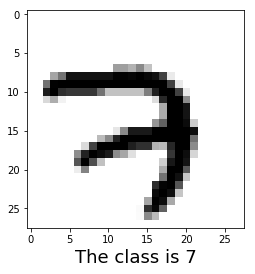

In [9]:
print(f"The label for the first image is {data.train.labels[0:1]}")
plt.imshow(data.train.images[0:1].reshape(28,28),cmap='binary');
xlabel=f"The class is {data.train.labels[0:1].argmax()}"
plt.gca().set_xlabel(xlabel,fontsize=18) 

In [ ]:
print(f"The label is {data.train.labels[1:2]}")
plt.imshow(data.train.images[1:2].reshape(28,28),cmap='binary');
xlabel=f"The class is {data.train.labels[1:2].argmax()}"
plt.gca().set_xlabel(xlabel,fontsize=18) 

In [ ]:
#print(data.train.images[0:1].max())
#modified_image=np.log(data.train.images[1:2]+0.01) 
#plt.imshow(modified_image.reshape(28,28),cmap='binary')
#plt.matshow(modified_image.reshape(28,28),cmap='binary')

In [4]:
data.test.cls=np.argmax(data.test.labels,axis=1)
data.test.cls

array([7, 2, 1, ..., 4, 5, 6])

## Step 3: Setting parameters/Data dimensions

In [5]:
img_size=28
img_size_flat=img_size*img_size
img_shape=(img_size,img_size)
# Tuple with height, width and depth 
img_shape_full=(img_size,img_size,1)
num_classes=10
num_channels=1

## Help functions

In [ ]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()
    
    
def plot_example_errors(cls_pred):
    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.

    # Boolean array whether the predicted class is incorrect.
    incorrect = (cls_pred != data.test.cls)

    # Get the images from the test-set that have been
    # incorrectly classified.
    images = data.test.images[incorrect]
    
    # Get the predicted classes for those images.
    cls_pred = cls_pred[incorrect]

    # Get the true classes for those images.
    cls_true = data.test.cls[incorrect]
    
    # Plot the first 9 images.
    plot_images(images=images[0:9],
                cls_true=cls_true[0:9],
                cls_pred=cls_pred[0:9])


## Step 4: import Keras API

## Keras API

In [6]:
from tensorflow.python.keras.models import Sequential 
from tensorflow.python.keras.layers import InputLayer, Input
from tensorflow.python.keras.layers import Reshape, MaxPooling2D 
from tensorflow.python.keras.layers import Conv2D, Dense, Flatten 
from tensorflow.python.keras.models import Model 

model = Sequential() 
model.add( InputLayer (input_shape=(img_size_flat,)))
model.add( Reshape (img_shape_full))
model.add( Conv2D (kernel_size=5, strides=1, filters=16, padding='same', activation='relu', name='layer_conv1'))
model.add( MaxPooling2D (pool_size=2, strides=2))
model.add( Conv2D (kernel_size=5, strides=1, filters=36, padding='same', activation='relu', name='layer_conv2'))
model.add( MaxPooling2D (pool_size=2, strides=2))
model.add( Flatten ())
model.add( Dense (128, activation='relu'))
model.add( Dense (num_classes, activation='softmax'))






Epoch 1/2
55000/55000 [==============================] - 61s 1ms/step - loss: 1.1087 - acc: 0.6999
Epoch 2/2
10000/10000 [==============================] - 5s 453us/step


## Step 5: Compilation (Optimizer, fit, predict) 

In [ ]:
from tensorflow.python.keras.optimizers import SGD
optimizer=SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=data.train.images,
          y=data.train.labels,
          epochs=2, batch_size=128)
result = model.evaluate(x=data.test.images,
                        y=data.test.labels)

In [ ]:
from tensorflow.python.keras.optimizers import Adam
optimizer = Adam(lr=1e-3)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=data.train.images,
          y=data.train.labels,
          epochs=2, batch_size=128)
result = model.evaluate(x=data.test.images,
                        y=data.test.labels)

## Prediction and evaulation

- Evaulation: The result is a list of values, containing the loss-value and all the metrics we defined when we compiled the model. Note that 'accuracy' is now called 'acc' which is a small inconsistency.

In [33]:
images=data.test.images 
data.test.cls=np.argmax(data.test.labels,axis=1)
y_pred = model.predict(x=images)
cls_pred=np.argmax(y_pred,axis=1)

print(cls_pred[0:9])
print(data.test.cls[0:9])

[7 2 1 0 4 1 4 9 5]
[7 2 1 0 4 1 4 9 5]


In [14]:
result = model.evaluate(x=data.test.images,
                         y=data.test.labels)

for name, value in zip(model.metrics_names, result):
    print(name, value)

10000/10000 [==============================] - 4s 437us/step
loss 0.282137068769
acc 0.9134


## Visualization 

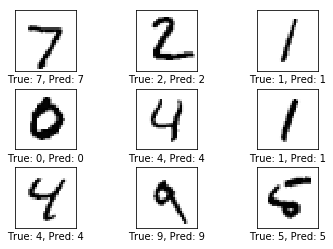

In [24]:
images_sample=data.test.images[0:9]
cls_true_sample=data.test.cls[0:9]
cls_pred_sample=cls_pred[0:9]



plot_images(images=images_sample,
            cls_true=cls_true_sample,
            cls_pred=cls_pred_sample)

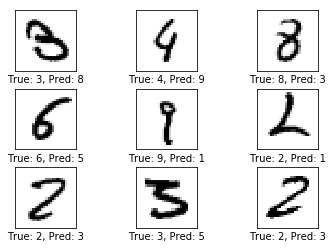

In [44]:
plot_example_errors(cls_pred)

In [46]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_4 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
layer_conv1 (Conv2D)         (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
layer_conv2 (Conv2D)         (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               225920    
__________

## Keras Function Model

In [10]:
# Note that the input-shape must be a tuple containing the image-size.
inputs = Input(shape=(img_size_flat,))

# Variable used for building the Neural Network.
net = inputs

# The input is an image as a flattened array with 784 elements.
# But the convolutional layers expect images with shape (28, 28, 1)
net = Reshape(img_shape_full)(net)

# First convolutional layer with ReLU-activation and max-pooling.
net = Conv2D(kernel_size=5, strides=1, filters=16, padding='same',
             activation='relu', name='layer_conv1')(net)
net = MaxPooling2D(pool_size=2, strides=2)(net)

# Second convolutional layer with ReLU-activation and max-pooling.
net = Conv2D(kernel_size=5, strides=1, filters=36, padding='same',
             activation='relu', name='layer_conv2')(net)
net = MaxPooling2D(pool_size=2, strides=2)(net)

# Flatten the output of the conv-layer from 4-dim to 2-dim.
net = Flatten()(net)

# First fully-connected / dense layer with ReLU-activation.
net = Dense(128, activation='relu')(net)

# Last fully-connected / dense layer with softmax-activation
# so it can be used for classification.
net = Dense(num_classes, activation='softmax')(net)

# Output of the Neural Network.
outputs = net

# Compilation (optimizer,fit)

In [11]:
from tensorflow.python.keras.models import Model
model2 = Model(inputs=inputs, outputs=outputs)

model2.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

model2.fit(x=data.train.images,
           y=data.train.labels,
           epochs=1, batch_size=128)

Epoch 1/1
55000/55000 [==============================] - 63s 1ms/step - loss: 0.2071 - acc: 0.9355


# Evaulate

In [15]:
result = model2.evaluate(x=data.test.images,
                         y=data.test.labels)
for name, value in zip(model.metrics_names, result):
    print(name, value)

10000/10000 [==============================] - 4s 440us/step
loss 0.0758123642274
acc 0.9763


acc: 97.63%


In [19]:
print("{0}: {1:.2%}".format(model2.metrics_names[1], result[1]))

acc: 97.63%


In [20]:
y_pred = model2.predict(x=data.test.images)
cls_pred = np.argmax(y_pred, axis=1)
cls_pred

array([7, 2, 1, ..., 4, 5, 6])

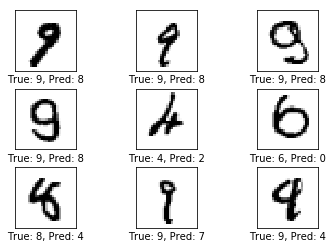

In [25]:
plot_example_errors(cls_pred)

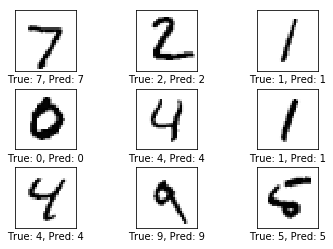

# Save and load FUNCTION models

In [27]:
path_model = 'model.keras'

In [29]:
model2.save(path_model)
del model2

In [30]:
from tensorflow.python.keras.models import load_model
model3=load_model(path_model)

In [31]:
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
reshape_2 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
layer_conv1 (Conv2D)         (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
layer_conv2 (Conv2D)         (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1764)              0         
__________

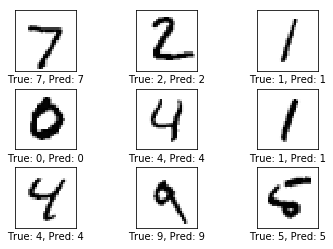

In [35]:
images=data.test.images 
cls_true=data.test.cls 
y_pred=model3.predict(x=images)
cls_pred=np.argmax(y_pred,axis=1)

cls_pred_sample=cls_pred[0:9]

plot_images(images=images_sample,
            cls_true=cls_true_sample,
            cls_pred=cls_pred_sample)

In [36]:
path_seqmodel = 'seq_model.keras'
model.save(path_seqmodel)
del model

In [37]:
seq_model=load_model(path_seqmodel)

ValueError: You are trying to load a weight file containing 4 layers into a model with 0 layers.